# Python String Formatting Best Practices
> Credit: [Dan Bader](https://realpython.com/team/dbader/) @[RealPython.com](https://realpython.com/python-string-formatting/)

Table of Contents
- #1 “Old Style” String Formatting (```%``` Operator)
- #2 “New Style” String Formatting (```str.format```)
- #3 String Interpolation / f-Strings (Python 3.6+)
- #4 Template Strings (Standard Library)
- Which String Formatting Method Should You Use?
- Key Takeaways

***Zen of Python*** 
>"one obvious way to do something in Python” 

So why are there four major ways to do string formatting in Python?

Let’s assume you’ve got the following to work with:

In [34]:
errno = 50159747054
name = 'David'

Based on these variables, you’d like to generate an output string containing a simple error message:

```'Hey David, there is a 0xbadc0ffee error!'```

***
# #1 “Old Style” String Formatting (% Operator)

Strings in Python have a unique built-in operation that can be accessed with the % operator.

In [35]:
'Hello, %s' % name

'Hello, David'

I’m using the ```%s``` format specifier here to tell Python where to substitute the value of name, represented as a string.

There are other format specifiers available that let you control the output format. For example, it’s possible to convert numbers to hexadecimal notation or add whitespace padding to generate nicely formatted tables and reports. (See Python Docs: “printf-style String Formatting”.)

Here, you can use the %x format specifier to convert an int value to a string and to represent it as a hexadecimal number:

In [36]:
'%x' % errno

'badc0ffee'

**Some of the Types***
- 's'	String format. This is the default type for strings and may be omitted.
- 'b'	Binary format. Outputs the number in base 2.
- 'c'	Character. Converts the integer to the corresponding unicode character before printing.
- 'd'	Decimal Integer. Outputs the number in base 10.
- 'o'	Octal format. Outputs the number in base 8.
- 'x'	Hex format. Outputs the number in base 16, using lower-case letters for the digits above 9.
- ...
- 'E'	Exponent notation. Same as 'e' except it uses an upper case ‘E’ as the separator character.
- 'f'	Fixed-point notation. Displays the number as a fixed-point number. The default precision is 6.
- 'F'	Fixed-point notation. Same as 'f', but converts nan to NAN and inf to INF.
- 'n'	Number. This is the same as 'g', except that it uses the current locale setting to insert the appropriate number separator characters.

The “old style” string formatting syntax changes slightly if you want to make multiple substitutions in a single string. Because the % operator takes only one argument, you need to wrap the right-hand side in a tuple, like so:

In [37]:
'Hey %s, there is a 0x%x error!' % (name, errno)

'Hey David, there is a 0xbadc0ffee error!'

It’s also possible to refer to variable substitutions by name in your format string, if you pass a mapping to the % operator:

In [38]:
'Hey %(name)s, there is a 0x%(errno)x error!' % {"name": name, "errno": errno }

'Hey David, there is a 0xbadc0ffee error!'

This makes your format strings easier to maintain and easier to modify in the future. You don’t have to worry about making sure the order you’re passing in the values matches up with the order in which the values are referenced in the format string.

Why is it called “old style” string formatting? It was technically superseded by “new style” formatting in Python 3.

***
# #2 “New Style” String Formatting (str.format)

Python 3 introduced a new way to do string formatting that was also later back-ported to Python 2.7. 

This “new style” string formatting gets rid of the %-operator special syntax and makes the syntax for string formatting more _regular_. Formatting is now handled by calling .format() on a string object.

You can use ```format()``` to do simple positional formatting, just like you could with “old style” formatting:

In [39]:
'Hello, {}'.format(name)

'Hello, David'

Or, you can refer to your variable substitutions by name and use them in any order you want.

In [40]:
'Hey {name}, there is a 0x{errno:x} error!'.format(name=name, errno=errno)

'Hey David, there is a 0xbadc0ffee error!'

This also shows that the syntax to format an int variable as a hexadecimal string has changed. Now you need to pass a format spec by adding a ```:x``` suffix. The format string syntax has become more powerful without complicating the simpler use cases.

In Python 3, this “new style” string formatting is to be preferred over %-style formatting. While “old style” formatting has been de-emphasized, it has not been deprecated. It is still supported in the latest versions of Python. According to this discussion on the Python dev email list and this issue on the Python dev bug tracker, %-formatting is going to stick around for a long time to come.

Still, the official Python 3 documentation doesn’t exactly recommend “old style” formatting or speak too fondly of it:
>“The formatting operations described here exhibit a variety of quirks that lead to a number of common errors (such as failing to display tuples and dictionaries correctly). Using the newer formatted string literals or the str.format() interface helps avoid these errors. These alternatives also provide more powerful, flexible and extensible approaches to formatting text.” (Source)

This is why I’d personally try to stick with str.format for new code moving forward. Starting with Python 3.6, there’s yet another way to format your strings. I’ll tell you all about it in the next section.

***
# #3 String Interpolation / f-Strings (Python 3.6+)
Python 3.6 added a new string formatting approach called formatted string literals or “f-strings”. This new way of formatting strings lets you use embedded Python expressions inside string constants.

In [41]:
f'Hello, {name}!'

'Hello, David!'

As you can see, this prefixes the string constant with the letter “f“—hence the name “f-strings.” This new formatting syntax is powerful. Because you can embed arbitrary Python expressions, you can even do inline arithmetic with it.

In [42]:
a = 5
b = 10
f'Five plus ten is {a + b} and not {2 * (a + b)}.'

'Five plus ten is 15 and not 30.'

Formatted string literals are a Python parser feature that converts f-strings into a series of string constants and expressions. They then get joined up to build the final string.

Imagine you had the following ```greet()``` function that contains an f-string:

In [43]:
def greet(name, question):
    return f"Hello, {name}! How's it {question}?"

greet('David', 'going')

"Hello, David! How's it going?"

When you disassemble the function and inspect what’s going on behind the scenes, you’ll see that the f-string in the function gets transformed into something similar to the following:

In [44]:
import dis
dis.dis(greet)

  2           0 LOAD_CONST               1 ('Hello, ')
              2 LOAD_FAST                0 (name)
              4 FORMAT_VALUE             0
              6 LOAD_CONST               2 ("! How's it ")
              8 LOAD_FAST                1 (question)
             10 FORMAT_VALUE             0
             12 LOAD_CONST               3 ('?')
             14 BUILD_STRING             5
             16 RETURN_VALUE


**The real implementation is slightly faster than that because it uses the ```BUILD_STRING``` opcode as an optimization. But functionally they’re the same:**

In [45]:
def greet(name, question):
    return "Hello, " + name + "! How's it " + question + "?"

In [46]:
import dis
dis.dis(greet)

  2           0 LOAD_CONST               1 ('Hello, ')
              2 LOAD_FAST                0 (name)
              4 BINARY_ADD
              6 LOAD_CONST               2 ("! How's it ")
              8 BINARY_ADD
             10 LOAD_FAST                1 (question)
             12 BINARY_ADD
             14 LOAD_CONST               3 ('?')
             16 BINARY_ADD
             18 RETURN_VALUE


String literals also support the existing format string syntax of the ```str.format()``` method. That allows you to solve the same formatting problems we’ve discussed in the previous two sections:

In [56]:
f"Hey {name}, there's a {errno:x} error!"

"Hey David, there's a badc0ffee error!"

Python’s new formatted string literals are similar to JavaScript’s Template Literals added in ES2015.

***
# #4 Template Strings (Standard Library)

Here’s one more tool for string formatting in Python: template strings. It’s a simpler and less powerful mechanism, but in some cases this might be exactly what you’re looking for.

Let’s take a look at a simple greeting example:

In [48]:
from string import Template
t = Template('Hey, $name!')
t.substitute(name=name)

'Hey, David!'

You see here that we need to import the Template class from Python’s built-in string module. Template strings are not a core language feature but they’re supplied by the string module in the standard library.

Another difference is that template strings don’t allow format specifiers. So in order to get the previous error string example to work, you’ll need to manually transform the ```int``` error number into a ```hex-string```:

In [49]:
templ_string = 'Hey $name, there is a $error error!'
Template(templ_string).substitute(name=name, error=hex(errno))

'Hey David, there is a 0xbadc0ffee error!'

That worked great.

So when should you use template strings in your Python programs? 
>In my opinion, the best time to use template strings is when you’re handling formatted strings generated by users of your program. Due to their reduced complexity, template strings are a safer choice. - _Dan bader_

The more complex formatting mini-languages of the other string formatting techniques might introduce security vulnerabilities to your programs. For example, it’s possible for format strings to access arbitrary variables in your program.

That means, if a malicious user can supply a format string, they can potentially leak secret keys and other sensitive information! Here’s a simple proof of concept of how this attack might be used against your code:

In [50]:
# This is our super secret key:
SECRET = 'this-is-a-secret'
# ...
class Error:
     def __init__(self):
            pass

# A malicious user can craft a format string that
# can read data from the global namespace:
user_input = '{error.__init__.__globals__[SECRET]}'

# This allows them to exfiltrate sensitive information,
# like the secret key:
err = Error()
user_input.format(error=err)

'this-is-a-secret'

See how a hypothetical attacker was able to extract our secret string by accessing the ```__globals__``` dictionary from a malicious format string? Scary, huh? Template strings close this attack vector. This makes them a safer choice if you’re handling format strings generated from user input:

In [51]:
user_input = '${error.__init__.__globals__[SECRET]}'
Template(user_input).substitute(error=err)

ValueError: Invalid placeholder in string: line 1, col 1

**Good it threw an error!**

***
# Which String Formatting Method Should You Use?
I totally get that having so much choice for how to format your strings in Python can feel very confusing.

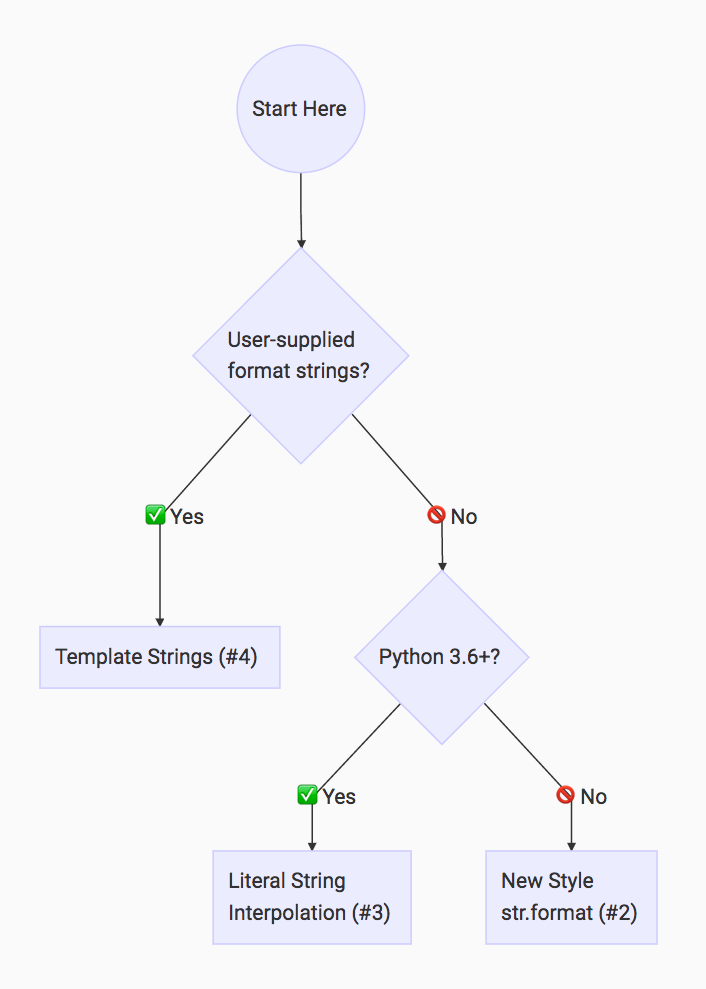

In [32]:
from IPython.display import Image
Image(filename='./python-string-formatting-flowchart.4ecf0148fd87.png') 

This flowchart is based on the rule of thumb writing Python string formatting:
>Python String Formatting Rule of Thumb: If your format strings are user-supplied, use Template Strings (#4) to avoid security issues. Otherwise, use Literal String Interpolation/f-Strings (#3) if you’re on Python 3.6+, and “New Style” str.format (#2) if you’re not.

# Key Takeaways
- Perhaps surprisingly, there’s more than one way to handle string formatting in Python.
- Each method has its individual pros and cons. Your use case will influence which method you should use.
- If you’re having trouble deciding which string formatting method to use, try our Python String Formatting Rule of Thumb.